<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [1]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [3]:
# Read data in pandas
# breast_cancer_csv = '../../IOD Data/breast-cancer-wisconsin-data.csv'
df = '../../IOD_Lab_Work_For_Github/Module_7/transfusion.data'
df = pd.read_csv(df)

# Check data has loaded correctly

df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df['Recency (months)'].unique()

array([ 2,  0,  1,  4,  5,  9,  3, 12,  6, 11, 10, 13,  8, 14,  7, 16, 15,
       23, 21, 18, 22, 26, 35, 38, 40, 74, 20, 17, 25, 39, 72],
      dtype=int64)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [5]:
# Perform EDA by investigating each of the points above 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
whether he/she donated blood in March 2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [7]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

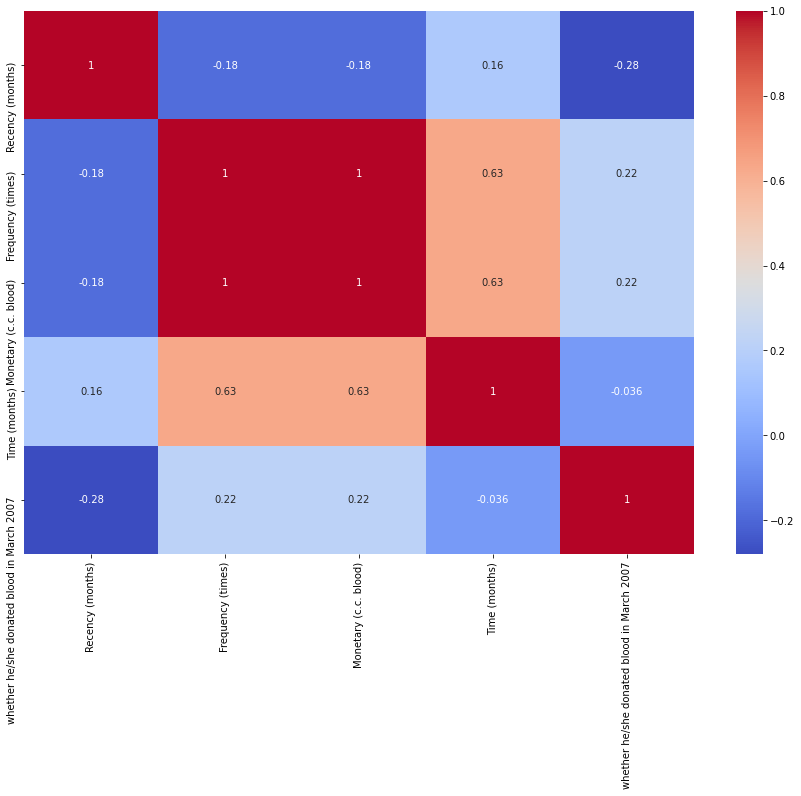

In [8]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [9]:
df.columns = ['recency','frequency','monetary','time','donated_07']
df.head()

,recency,frequency,monetary,time,donated_07
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


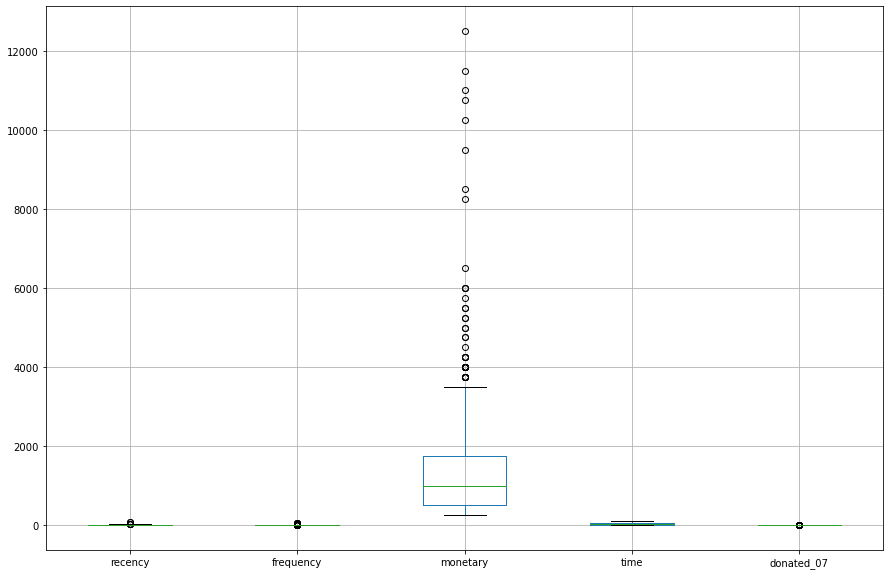

In [10]:
# Filter/subset/clean the data according to your EDA findings
plt.figure(figsize = (15, 10))
df.boxplot()
plt.show()

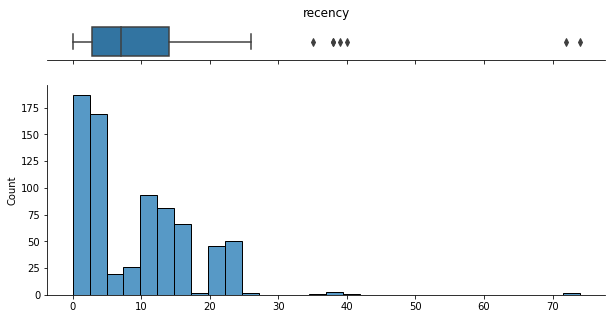

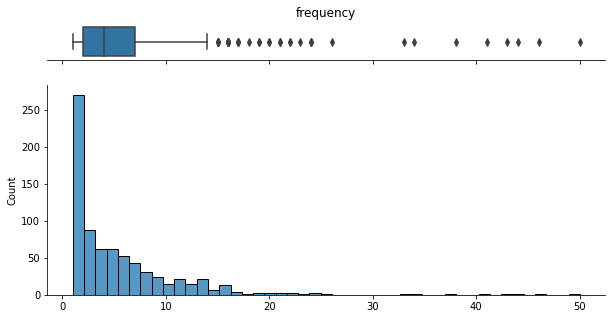

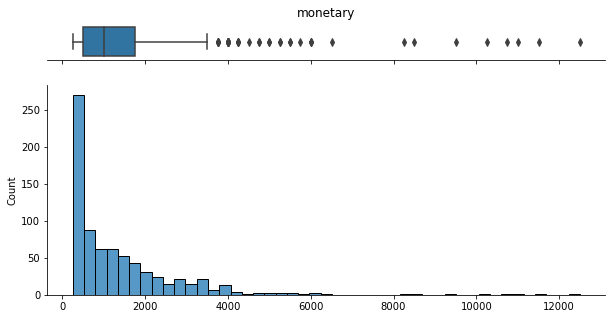

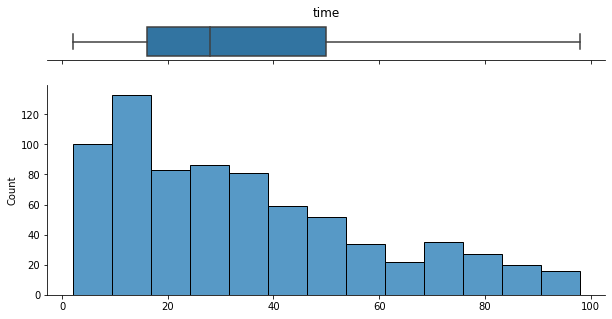

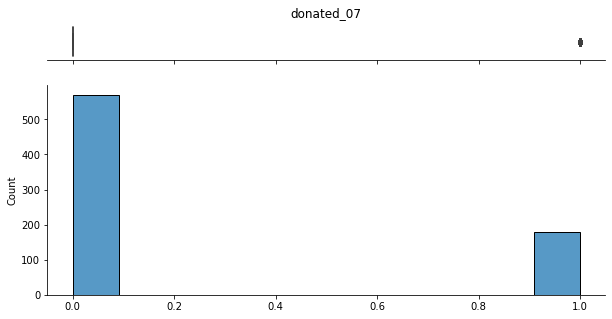

In [11]:
# Vincent's boxplots, required some tweaks before the code start working

for c in df.columns:
    fig, ax = plt.subplots(2, figsize = (10, 5), sharex = True, gridspec_kw = {'height_ratios' : (0.15, 0.85)})
    
    ax_box = ax[0]
    ax_box = sns.boxplot(x = df[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    
    ax_hist = ax[1]
    
    if c == 'donated_07':
        ax_hist = sns.histplot(x = df[c], kde = False, ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
    else:
        ax_hist = sns.histplot(x = df[c], ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
        
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [12]:
# Features (input)
X = df[['recency','frequency','monetary','time']]

In [13]:
# Target (output)
y= df['donated_07']

In [14]:
y.dtype

dtype('int64')

In [15]:
# Imbalanced classes
y.value_counts()

0    570
1    178
Name: donated_07, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)

oversampled_trainX, oversampled_trainY = sm.fit_resample(X, y)
df = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
df.columns

Index(['donated_07', 'recency', 'frequency', 'monetary', 'time'], dtype='object')

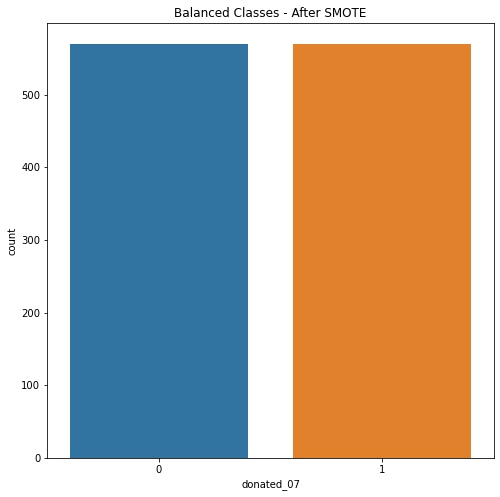

In [17]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'donated_07', data= df)
plt.title('Balanced Classes - After SMOTE')
plt.show()

### This is a classification problem and we we will use supervised learning

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [18]:
X.var()

recency      6.553543e+01
frequency    3.409751e+01
monetary     2.131094e+06
time         5.942242e+02
dtype: float64

In [19]:
# X needs scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X.var()

1.0

In [21]:
# Split your data

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [23]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [24]:
# Create a random search object

random_rfc = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [25]:
# Fit the object to our data
random_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [26]:
random_rfc.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [27]:
# Choose a model or models

random_rfc = RandomForestClassifier(bootstrap= True, max_depth= 70, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 10, n_estimators= 400)

# Step 9: Fit the Model

In [28]:
# Fit model

random_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [29]:
# Evaluate model against training set

y_train_pred = random_rfc.predict(X_train)

In [30]:
rfc_train_score = random_rfc.score(X_train, y_train)
print('RFC train score: ', rfc_train_score)

RFC train score:  0.8311036789297659


In [31]:
rfc_as_train = accuracy_score(y_train, y_train_pred)
print('RFC train accuracy score: ',rfc_as_train)

RFC train accuracy score:  0.8311036789297659


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [32]:
# Evaluate model against test set
y_test_pred = random_rfc.predict(X_test)

rfc_test_score = random_rfc.score(X_test, y_test)
print('RFC test score: ', rfc_test_score)

RFC test score:  0.8


In [33]:
rfc_as_test = accuracy_score(y_test, y_test_pred)
print('RFC test accuracy score: ',rfc_as_test)

RFC test accuracy score:  0.8


In [34]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       114
           1       0.62      0.44      0.52        36

    accuracy                           0.80       150
   macro avg       0.73      0.68      0.70       150
weighted avg       0.79      0.80      0.79       150



In [35]:
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_test_pred)
confusion_df = pd.DataFrame(confusion_matrix_rfc, index=['Not Donated', 'Donated'], columns=['predicted_Not Donated', 'predicted_Donated'])


print(confusion_df, '\n')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

             predicted_Not Donated  predicted_Donated
Not Donated                    104                 10
Donated                         20                 16 

[['TN' 'FP']
 ['FN' 'TP']]


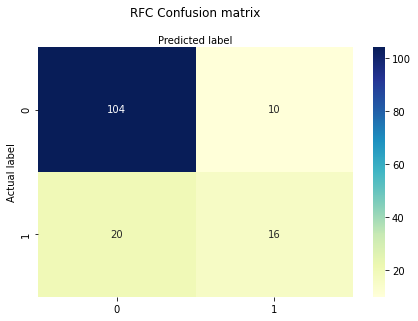

In [36]:
class_names=['Not Donated','Donated'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('RFC Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

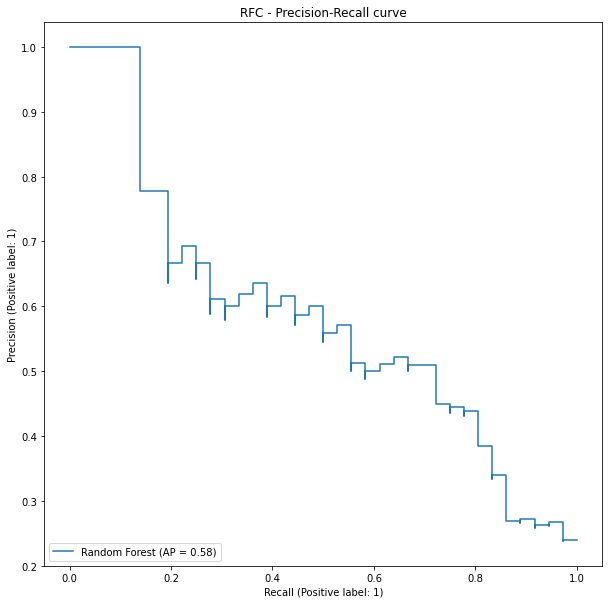

In [38]:
# Due to class imbalance I will be using PR curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(10, 10))
PrecisionRecallDisplay.from_estimator(random_rfc, X_test, y_test, ax = plt.gca(),name = "Random Forest")

plt.title('RFC - Precision-Recall curve')
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

__ Model is predicting very poorly on class 1

>

>

>



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



